This is a simple Python code where I simulate the orbit of venus around Earth. My goal is to show the flower of venus path. The integrators used are either Runge Kutta or Euler

Flower of Venus
The path of venus around the earth is an epicyclic pattern Venus makes as seen from Earth. Hence this phenomena is due to relative motion of Venus and Earth around the Sun. It's a geocentric trace, rather than an orbital path.

The first code is a 2D Fourier based code for quick results using simple math. This means that I am assuming that planetary motions is circular and periodic ( which in reality motion is never circular, but elliptical ). I will be using cosines and sines. From special relativity, I will use be subtracting Earth's position from Venus', so that the simulation shows what we would see from Earth. I will use:

x(t) = Rcos(wt)   and   y(t) = Rsin(wt)   for **circular motion** at constant speed.

Here, R represents orbital radii in arbitrary units, w = angular velocity = 2pi/T, T = orbital period, and t = time.

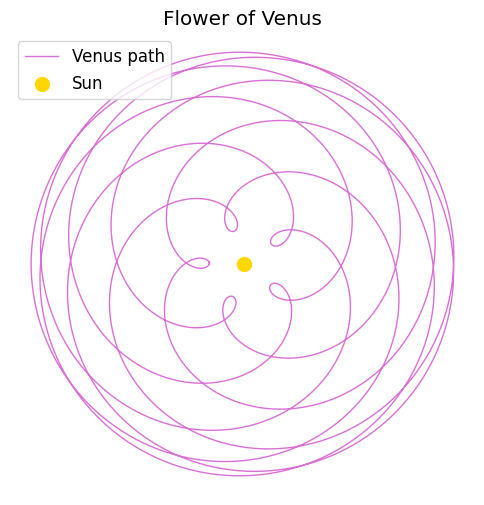


 Earth and Venus are in a 8:13 orbital resonance creating a (pentagramic) 5 petal rose. 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# parameters
R_earth = 1.0
R_venus = 0.723  # orbital radius (AU)
T_earth = 365.25
T_venus = 224.7   # orbital periods around the Sun, in days

# time
days = np.linspace(0, 8 * T_earth, 5000)

# heliocentric positions
def earthPosition(t):
  angle = 2 * np.pi * t / T_earth
  return R_earth * np.array([np.cos(angle), np.sin(angle)])

def venusPosition(t):
  angle = 2 * np.pi * t / T_venus
  return R_venus * np.array([np.cos(angle), np.sin(angle)])

# geocentric positions (relative motion)
earth_pos = np.array([earthPosition(t) for t in days]).T
venus_pos = np.array([venusPosition(t) for t in days]).T
relative = venus_pos - earth_pos

# plot parameters
plt.figure( figsize=( 6, 6) )
plt.plot( relative[0], relative[1], '-', linewidth=1,
         label='Venus path', color='orchid' )
plt.scatter(0, 0, color='gold', s=100, label='Sun')
plt.title( "Flower of Venus" )
plt.axis( 'equal' )
plt.axis('off')
plt.xlabel( "X (AU)" )
plt.ylabel( "Y (AU)" )
plt.legend()
plt.grid (True)
plt.show( )

# comment
print()
print(" Earth and Venus are in a 8:13 orbital resonance creating a (pentagramic) 5 petal rose. ")

2. Now, in this next simulation, I adopt a rk4 algorithm, also known as Runge Kutta 4. This algorithm will solve a system of differential equations since I will be treating Earth and Venus as particles orbiting the Sun. I will be applying Newton's Universal Law of Gravitation:

      F = - (GMm)/ r^2 --> a = -(GM)/r^2

where:
      G = gravitational constant
      M = mass of the Sun
      r = distance from the Sun to the planet

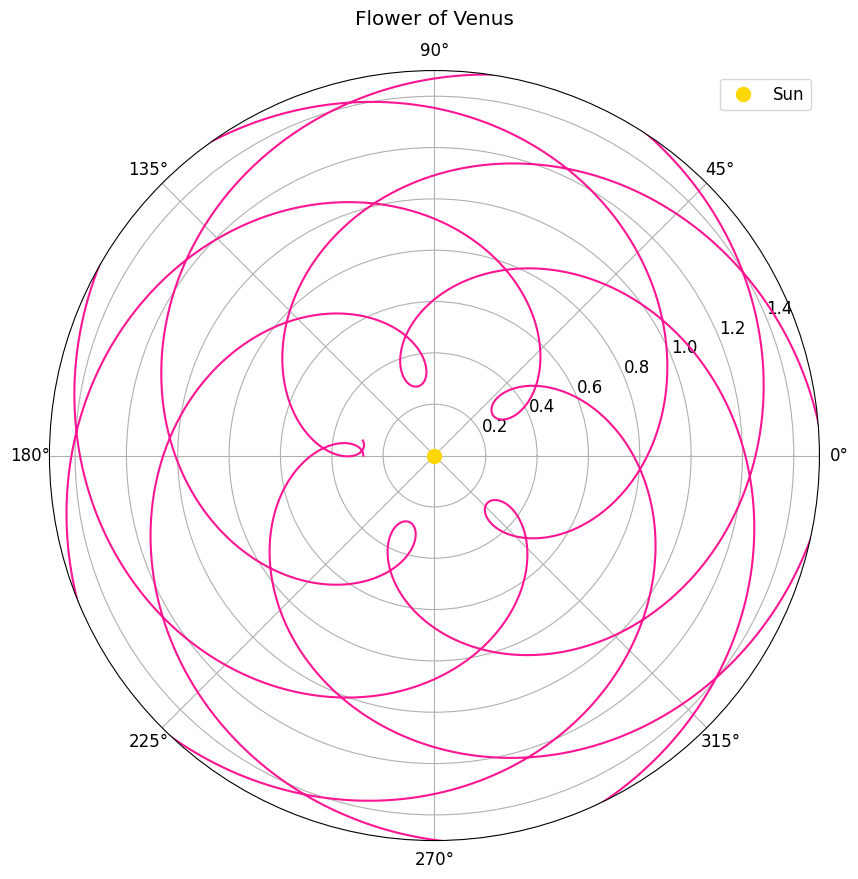

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

def derivs( y, t ):
    """
    2 body problem
    Derivatives for RK4 method: [drx/dt, dry/dt, dvx/dt, dvy/dt]
    """
    GM = 4 * np.pi**2                      # gravitational constant (1AU)
    r = np.array( [y[0], y[1]] )           # position vector
    v = np.array( [y[2], y[3]] )           # velocity vector
    accel = - GM * r / np.power( np.linalg.norm( r ), 3 )  # newton's law of gravity
    return np.array( [v[0], v[1], accel[0], accel[1]] )  # velocity and acceleration due to gravity

def rk4( y, t, dt, derivs ):
    """
    Runge-Kutta 4 integration. Calculates intermediate slopes from k1 to k4
    and combies them to give the next step.
    """
    k1 = dt * derivs( y, t )
    k2 = dt * derivs( y + 0.5 * k1, t + 0.5 * dt )
    k3 = dt * derivs( y + 0.5 * k2, t + 0.5 * dt )
    k4 = dt * derivs( y + k3, t + dt )
    return y + ( k1 + 2*k2 + 2*k3 + k4 ) / 6.0

def orbit(r0, v0, dt, t_stop):
    """
    Simulate the orbit using RK4 method.
    r0: initial distance from Sun (AU)
    v0: initial tangential velocity (AU/year)
    dt: time step
    t_stop: total simulation time (years)
    """
    r = np.array( [r0, 0.0] )
    v = np.array( [0.0, v0] )
    y = np.array( [r0, 0, 0, v0] )  # rx, ry, vx, vy - for RK4

    time = 0.0  # initial time
    rplot = []
    thplot = []

    while time <= t_stop:
              rplot.append( np.linalg.norm( r ) )
              thplot.append( np.arctan2( r[1], r[0] ) )

              y = rk4( y, time, dt, derivs )
              r = np.array( [y[0], y[1]] )
              v = np.array( [y[2], y[3]] )
              time += dt

    return np.array(rplot), np.array(thplot)

def flower():
    """
    Plots the 'Flower of Venus' pattern – the pentagram formed by Venus
    as seen from Earth over an 8-year period.
    """
    # Earth's orbit parameters (1 AU, 1 year)
    earth_r0 = 1.0
    earth_v0 = 2 * np.pi

    # Venus's orbit parameters (0.723 AU, 0.615 year)
    venus_r0 = 0.723
    venus_v0 = 2 * np.pi * np.sqrt( 1 / 0.723 )  # From Kepler's 3rd law

    # time parameters
    dt = np.float64( 0.001 )  # time step
    t_stop = 8.0  # 8 years

    # simulate orbits
    earth_r, earth_th = orbit( earth_r0, earth_v0, dt, t_stop )
    venus_r, venus_th = orbit( venus_r0, venus_v0, dt, t_stop )

    # Calculate Venus's position relative to Earth
    rel_x = venus_r * np.cos( venus_th ) - earth_r * np.cos( earth_th )
    rel_y = venus_r * np.sin( venus_th ) - earth_r * np.sin( earth_th )
    rel_th = np.arctan2( rel_y, rel_x )
    rel_r = np.sqrt( rel_x**2 + rel_y**2 )

    # Plot the Flower of Venus
    plt.figure( figsize=( 10, 10 ) )
    ax = plt.subplot( 111, polar=True )
    ax.plot( rel_th, rel_r, lw=1.5, color='deeppink' )
    ax.plot(0, 0, 'o', markersize=10, color='gold', label='Sun')
    ax.set_title( "Flower of Venus", va='bottom', pad=30 )
    ax.set_rmax( 1.5 )
    ax.legend(loc='upper right')
    plt.show( )

flower()